In [1]:
from termcolor import colored
import math
import numpy as np
import collections
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

## Kasiski Test

In [2]:
def identify(X,steps,mode=0):
    """
    This function searches through the string and identify if there are any repeating substrings of "steps" char.
    This function outputs the substring along with their number of repetitions and 
    X:Input for string
    steps: range of the substring to search
    """
    X=X.replace(" ","")
    substring={}
    dist_list=[]
    for i in range(len(X)-1-steps):
        string=X[i:i+steps]
        call=1
        dist=0
        for m in range(i+1,len(X)-1-steps):
            if(string==X[m:m+steps]):
                call+=1
                dist=m-i
                dist_list.append(dist)
        if(call>1):
            substring[string]=(call,dist)   
    gcd=0
    if(len(dist_list)==0):
        pass
    else:
        gcd=np.gcd.reduce(np.array(dist_list))
    if(mode==0):
        return substring,gcd
    else:
        return substring

In [3]:
x="IZTTGOUVRDYKQIBHYWILPXGUQLRLASVYCGTJCCGSXBICGHAGGERTGQGZQEHGUZZAXKKKFPEZVYCEKCXZBTWKQIBHBGCEMCMFKMGPEDTFZAXADLRXMWUVYHBSTKFPGAQJRDMVGILPMITRJATBILYVXDTFATLGKEECEDRIMQESOJRWXFGRPTNGGWSAASWIGHMWEJD DKKGVBXGUQLRXGSNZEXUZGJCCMSPTCHBKCJYQESVFDDKAXRJXWSPXJXLVUVLIXBEVQ UKCOKFTKSORGCBBINMGWGCWRTKTQCJDPWPXRWHGGYCJKWUKGRLHJVQTGHGEA TLK GICDYHGELDGGGEQXVONSSILHKCJKTZKUFTKSCICIASJVSGBGVZAHBIUVBIASTVLTXRUK MQXOVCCPLHQECKXFDKFTKSERLDGZASCDGSOFPTGCWERWTBVYCGXOTVTTKPULLAXGUKFTKSKJYRHBLLLRMWQEMGTDTVNDLWVZMCUCVYMUPVKTFPKSXVPNKOTVGUMVGIC PKSCUHTVHKMCHMVGICBNGVRJHHPGEMJGGVYCWXITZQIBQYFPZLWPGYGMPGTYJLSQW RWXDQJQXUWNZRNHTKDNABSFJSQCSEKQCXWVYCGISTWCRMBQIYETBIIYBUIVDMKXEW ZCIEMCEBHISCBQDYHNPGHTGGERTGQGNGIAHYFTTKPURLSGCPFSCLKKKFIASKDNABSFJS QCSEKMURCWJGCVSVYCHIOEVMUPCTUQIAOVTYCICUJGQEMRRPIBQKGYIXWPGCGYSEKN PGUTRKHBGUDYAEWVJCPLMGEMJZVVFKPGICCJNMOIVYRAWPUGKBRWRJLHFFNGIAWVJCABUKSJTIOTKQDYGRVCRAOPUQTXWHKFTLSVFDLHFFJMQXMUKFDLSVYPTXGKDNAXVGLPXLHKTQLASVYCGHFPFRNHINZITMVGHSPEWVPMUMVGJCCMSPTCHIFQUSRXRKJYBTHVVPDYHCJRT"
string,gcd=identify(x,5)
# The greatest common divisor from obtained function is supposedly going to be the length of the key.
print(gcd)

6


In [116]:
x.replace(" ","")

'IZTTGOUVRDYKQIBHYWILPXGUQLRLASVYCGTJCCGSXBICGHAGGERTGQGZQEHGUZZAXKKKFPEZVYCEKCXZBTWKQIBHBGCEMCMFKMGPEDTFZAXADLRXMWUVYHBSTKFPGAQJRDMVGILPMITRJATBILYVXDTFATLGKEECEDRIMQESOJRWXFGRPTNGGWSAASWIGHMWEJDDKKGVBXGUQLRXGSNZEXUZGJCCMSPTCHBKCJYQESVFDDKAXRJXWSPXJXLVUVLIXBEVQUKCOKFTKSORGCBBINMGWGCWRTKTQCJDPWPXRWHGGYCJKWUKGRLHJVQTGHGEATLKGICDYHGELDGGGEQXVONSSILHKCJKTZKUFTKSCICIASJVSGBGVZAHBIUVBIASTVLTXRUKMQXOVCCPLHQECKXFDKFTKSERLDGZASCDGSOFPTGCWERWTBVYCGXOTVTTKPULLAXGUKFTKSKJYRHBLLLRMWQEMGTDTVNDLWVZMCUCVYMUPVKTFPKSXVPNKOTVGUMVGICPKSCUHTVHKMCHMVGICBNGVRJHHPGEMJGGVYCWXITZQIBQYFPZLWPGYGMPGTYJLSQWRWXDQJQXUWNZRNHTKDNABSFJSQCSEKQCXWVYCGISTWCRMBQIYETBIIYBUIVDMKXEWZCIEMCEBHISCBQDYHNPGHTGGERTGQGNGIAHYFTTKPURLSGCPFSCLKKKFIASKDNABSFJSQCSEKMURCWJGCVSVYCHIOEVMUPCTUQIAOVTYCICUJGQEMRRPIBQKGYIXWPGCGYSEKNPGUTRKHBGUDYAEWVJCPLMGEMJZVVFKPGICCJNMOIVYRAWPUGKBRWRJLHFFNGIAWVJCABUKSJTIOTKQDYGRVCRAOPUQTXWHKFTLSVFDLHFFJMQXMUKFDLSVYPTXGKDNAXVGLPXLHKTQLASVYCGHFPFRNHINZITMVGHSPEWVPMUMVGJCCMSPTCHIFQUSRXRKJYBTHVVPDYHCJRT'

## Division Algorithm

In [64]:
def division(x,gcd=6):
    """
    This function will divide the x:string into "gcd" parts
    to convert the reflect the vignere cipher as shift 
    cipher. Here I have fixed the default value of cipher equal to 6. 
    """
    x=x.replace(" ","")
    x0=""
    x1=""
    x2=""
    x3=""
    x4=""
    x5=""
    fAor i in range(len(x)-1):
        #One has to add the if else condition according to gcd obtained from kasiski test
        if(i%gcd==0):
            x0+=x[i]
        elif(i%gcd==1):
            x1+=x[i]
        elif(i%gcd==2):
            x2+=x[i]
        elif(i%gcd==3):
            x3+=x[i]
        elif(i%gcd==4):
            x4+=x[i]
        elif(i%gcd==5):
            x5+=x[i] 
    return x0,x1,x2,x3,x4,x5

In [65]:
x0,x1,x2,x3,x4,x5= division(x)

## Index Of Confidence

In [66]:
def IOC(X,gcd):
    """
    This algorithm will divide X string into equal pieces of "gcd". Calculate the weighted avg of probabilty 
    of each charachter in the piece. The average of obtained Ic's is the ouput
    """
    avg=0
    freq=dict(Counter(X))
    for i in freq:
        avg+=(freq[i]/len(X))*(freq[i]/len(X))
    return avg

In [67]:
avg0=round(IOC(x0,6),3)
avg1=round(IOC(x1,6),3)
avg2=round(IOC(x2,6),3)
avg3=round(IOC(x3,6),3)
avg4=round(IOC(x4,6),3)
avg5=round(IOC(x5,6),3)
print(avg0,avg1,avg2,avg3,avg4,avg5,"\n")
print("Avg:",round((avg0+avg1+avg2+avg3+avg4+avg5)/6,3))

0.078 0.064 0.076 0.067 0.075 0.081 

Avg: 0.074


In [68]:
#0.074 is approximately equal to 0.065

## Frequency Analysis

In [69]:
def freq(X):
    X=X.replace(" ","")
    freq_table=dict(Counter(X))
    freq_table=dict(sorted(freq_table.items()))
    values=np.array(list(freq_table.values()))
    keys=np.array(list(freq_table.keys()))
    plt.figure(figsize=(15,6))
    plt.bar(keys,values)
    return freq_table

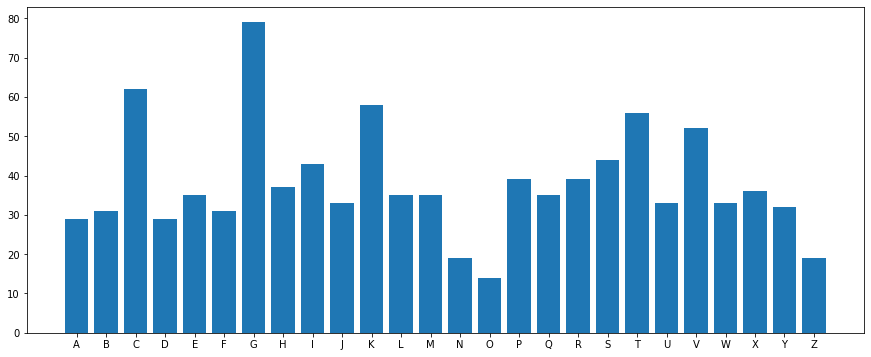

In [70]:
table=freq(x)

<img src="https://www.researchgate.net/profile/William_Buchanan2/publication/325714929/figure/fig2/AS:636677437526016@1528807138060/Relative-Frequency-of-Letters-in-the-English-Language.png">

## According to the frequency chart above we are going to make guesses

## Shift text function

In [ ]:
# Let us first define the shift function first before moving on further
def shifttext(text, shift):
    a = ord('a')
    output=''.join(
        chr((ord(char) - a + shift) % 26 + a) if 'a' <= char <= 'z' else char
        for char in text.lower())
    return output.upper()

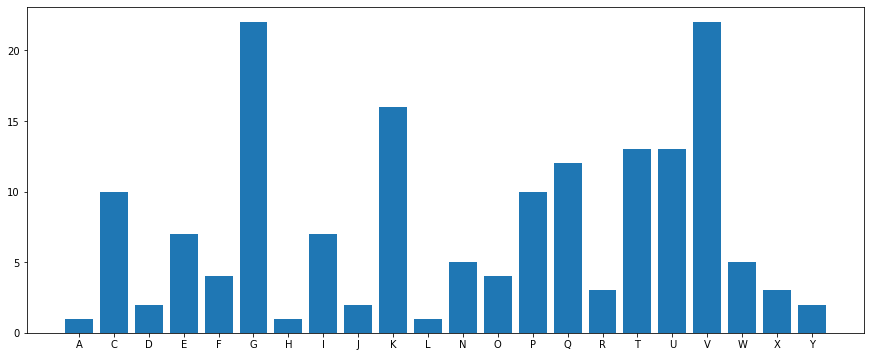

In [105]:
table0=freq(x0)

In [128]:
# Shifting back the above cipher by two places can place the g to e, v to t, and c to a.
alphabets="ABCDEFGHIJKLMNOPQRSTUVWXYZ"
new_x0=shifttext(x0,24) # Y or C

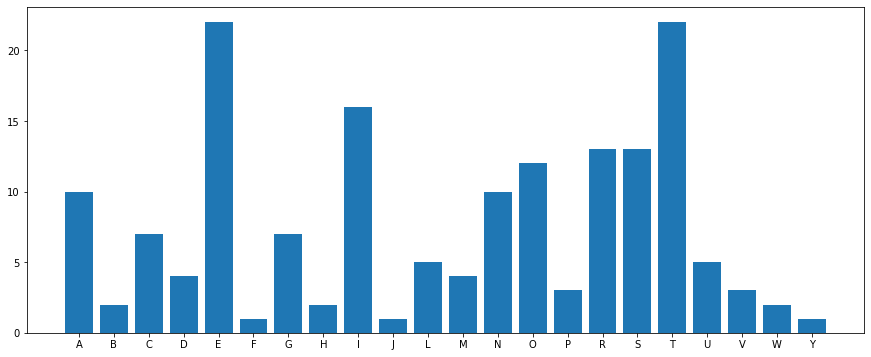

In [129]:
table_0=freq(new_x0)

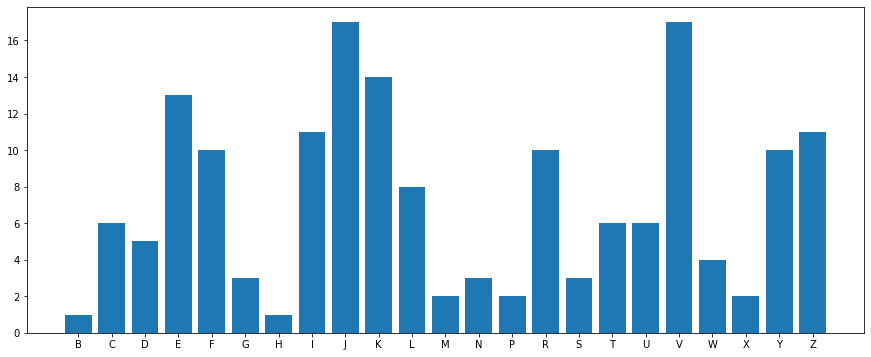

In [108]:
table1=freq(x1)

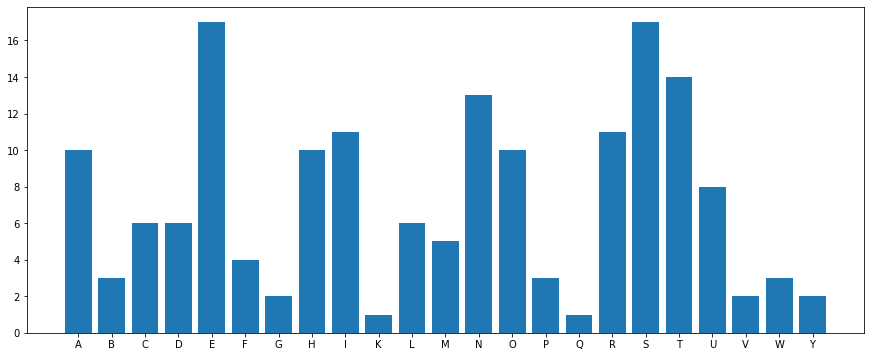

In [121]:
# M,N,P are three lowest frequency charachters and they might correspond to X,Y,Z.
# Let us now shift the x1 by 9 to bring the cipher text to their appropriate positions
new_x1=shifttext(x1,9) #J or R
table_1=freq(new_x1)

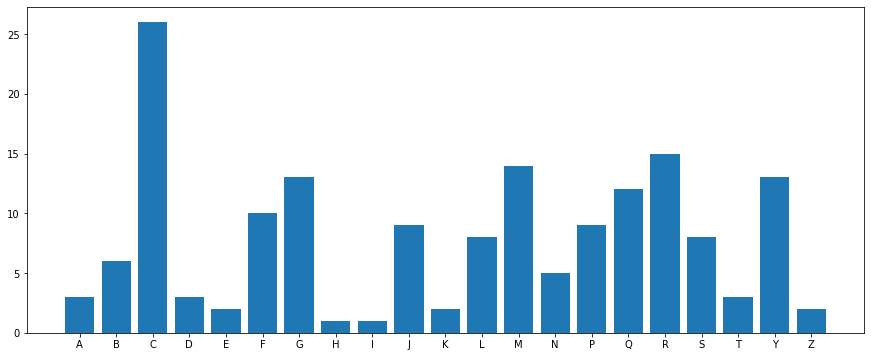

In [118]:
table2=freq(x2)

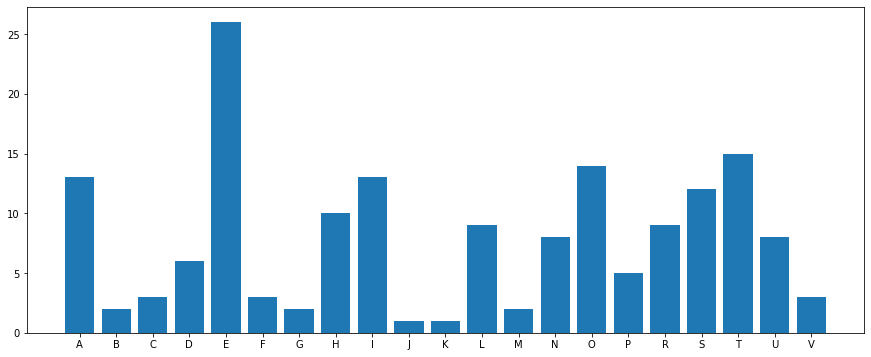

In [123]:
#Shifting it backwards by 2 might make things right, which is similar to 
new_x2=shifttext(x2,2)
table_2=freq(new_x2) # C or Y

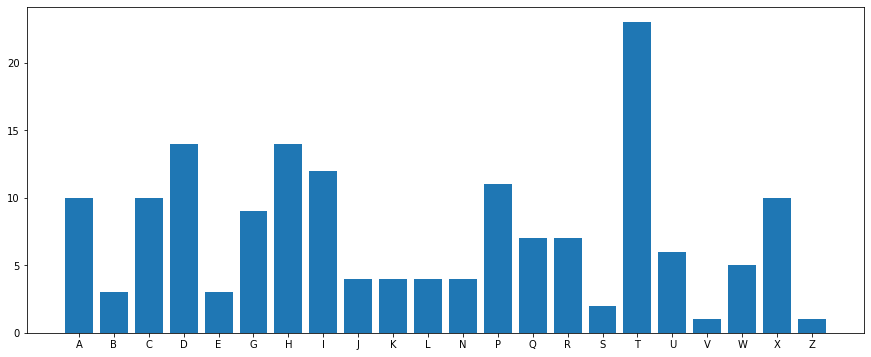

In [124]:
table3=freq(x3)

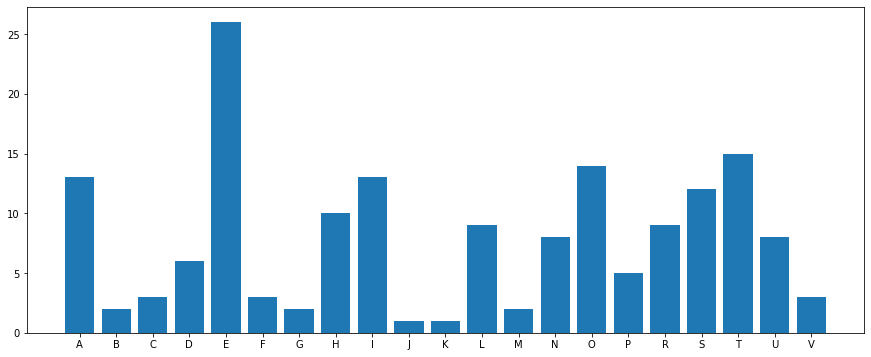

In [125]:
new_x3=shifttext(x3,11)
table_2=freq(new_x2) # L or P

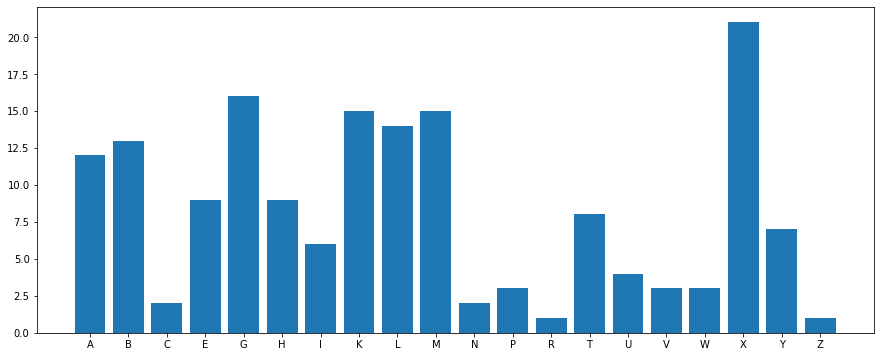

In [126]:
table4=freq(x4)

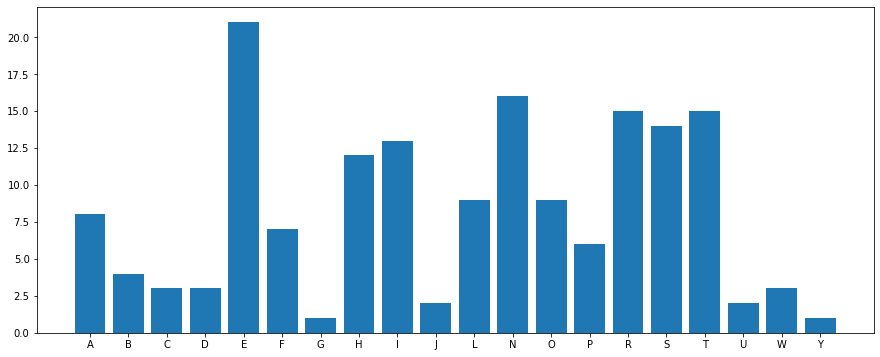

In [127]:
new_x4=shifttext(x4,7)
table_4=freq(new_x4) #H or T

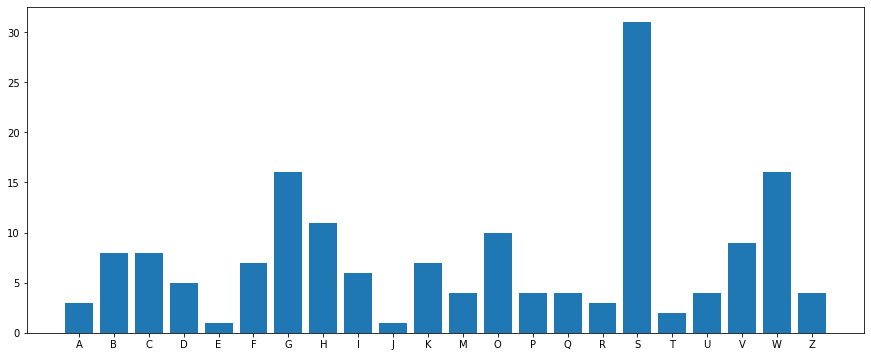

In [131]:
table5=freq(x5)

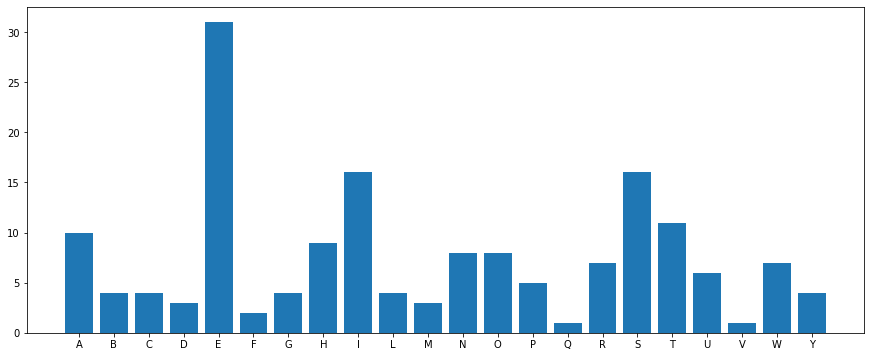

In [130]:
new_x5=shifttext(x5,12)
table_5=freq(new_x5) #M or O

In [132]:
# Two words can be formed after the transition YJCLHM or CRYPTO. 
# From literal sense the second one seems more appropriate

In [142]:
# Now let us combine the new x0,x1,x2,x3,x4,x5
def combine(X,x0,x1,x2,x3,x4,x5):
    """
    This function will divide the x:string into "gcd" parts
    to convert the reflect the vignere cipher as shift 
    cipher. Here I have fixed the default value of cipher equal to 6. 
    """
    x=""
    i0=0
    i1=0
    i2=0
    i3=0
    i4=0
    i5=0
    for i in range(len(X)-1):
        #One has to add the if else condition according to gcd obtained from kasiski test
        if(i%6==0):
            x+=x0[i0]
            i0+=1
        elif(i%6==1):
            x+=x1[i1]
            i1+=1
        elif(i%6==2):
            x+=x2[i2]
            i2+=1
        elif(i%6==3):
            x+=x3[i3]
            i3+=1
        elif(i%6==4):
            x+=x4[i4]
            i4+=1
        elif(i%6==5):
            x+=x5[i5] 
            i5+=1
        if(i==980):
            break
    return x

In [143]:
combine(x,new_x0,new_x1,new_x2,new_x3,new_x4,new_x5)

'GIVENASETOFWORDSFIGURINGOUTWHETHERAVALIDENGLISHSENTENCEISPOSSIBLEWITHALLTHEPROVIDEDWORDSISANONTRIVIALPROBLEMBUTITISEASIERTHANMOSTOTHERNATURALLANGUAGEPROCESSINGNLPPROBLEMSTHEREAREUSEFULHEURISTICSFORWEEDINGOUTINELIGIBLESENTENCESIWASABLETOFORMVALIDENGLISHSENTENCESFROMTHEREMAININGWORDSAFTERFOLLOWINGTHOSEHEURISTICSTHESENTENCESWEREOFTENNONSENSICALBUTSTILLVALIDHEREARETHEHEURISTICSIUSEDTHERENEEDSTOBEATLEASTONEVERBTHERECANONLYBEONEMORENOUNTHANTHEREAREVERBSUNLESSTHEREISACONJUNCTIONORAPREPOSITIONBOTHOFWHICHAREVERYRAREIFTHEREAREADJECTIVESTHEREMUSTALSOBENOUNSTHEHEURISTICWORKSINPARTBECAUSEOFTHEPOSSIBILITYOFIMPLIEDSUBJECTSNEITHERPERFECTNORAPANGRAMBUTMOVEQUIETLYANDSPEAKSOFTLYISASENTENCEWITHTWOVERBSANDNONOUNSWITHTHEIMPLIEDSUBJECTOFYOUSINCETHESPACEOFWORDSTHATCANPOSSIBLYPARTICIPATEINPERFECTPANGRAMSISSMALLITSEASYENOUGHTOMANUALLYTAGEACHINDIVIDUALWORDWITHITSELIGIBLEPARTSOFSPEECHANDSEEIFTHESETOFWORDSOBEYSTHOSETHREESIMPLEHEURISTICSWHETHERORNOTYOULIKETHEQUALITYOFTHESENTENCESPRODUCEDISAMATTER'

In [ ]:
"""
two_letter="th, he, er, on, an, of, to, in, it, is, be, as, at, so, we, he, by, or, do, if, me, my, up, an, go, no, us, am"
three_letter="the, and, for, are, but, not, you, all, any, can, had, her, was, one, our, out, day, get, has, him, his, how, man, new, now, old, see, two, way, who, boy, did, its, let, put, say, she, too, use"
four_letter="that, with, have, this, will, your, from, they, know, want, been, good, much, some, time"
print("Most frequently occuring two letters in english are:\n",two_letter,"\n")
print("Most frequently occuring three letters in english are:\n",three_letter,"\n")
print("Most frequently occuring four letters in english are:\n",four_letter,"\n")
"""